In [35]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler, scale
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data = pd.read_csv('ckd_data.csv',sep='\t')
data = data.replace('?','NaN')
Numdata = data.loc[0:,'age':'bp'].join(data.loc[0:,'bgr':'rbcc'])
Catdata = data.loc[0:,'sg':'ba'].join(data.loc[0:,'htn':'class'])

# Preprocessing

In [36]:
for i in Catdata.columns:
    the_value = str(Catdata[i].mode().values[0])
    Catdata[i].replace('NaN',the_value,inplace = True)
    if i != 'class':
        dummy_data = pd.get_dummies(Catdata[i], prefix=i+"_", drop_first=True)
        Catdata = pd.concat([Catdata, dummy_data], axis=1)
        Catdata.drop(i, axis=1, inplace=True)
    elif i == 'class':
        dummy_data = pd.get_dummies(Catdata[i])
        dummy_data.drop("notckd", axis=1, inplace=True)
        dummy_data.rename(columns={"ckd": "class"}, inplace=True)
        Catdata.drop(i, axis=1, inplace=True)
        Catdata = pd.concat([Catdata, dummy_data], axis=1)

In [37]:
Catdata.head()

,sg__1.01,sg__1.015,sg__1.02,sg__1.025,al__1,al__2,al__3,al__4,al__5,su__1,...,pc__normal,pcc__present,ba__present,htn__yes,dm__yes,cad__yes,appet__poor,pe__yes,ane__yes,class
0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,1,1,1
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [38]:
imp1 = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp1.fit(Numdata)
Numdata.loc[0:,:] = imp1.transform(Numdata)
data = Numdata.join(Catdata)
datas = Numdata.join(Catdata)
#datas.loc[:,'age':'ane'] = scale(data.loc[:,'age':'ane'])
data['cons'] = 1 
datas['cons'] = 1

## original

In [39]:
datas.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pcc__present,ba__present,htn__yes,dm__yes,cad__yes,appet__poor,pe__yes,ane__yes,class,cons
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,...,0,0,1,1,0,0,0,0,1,1
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,...,0,0,0,0,0,0,0,0,1,1
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,...,0,0,0,1,0,1,0,1,1,1
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,...,1,0,1,0,0,1,1,1,1,1
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,...,0,0,0,0,0,0,0,0,1,1


## split train and test

In [40]:
labels = data.loc[0:,['class']]
features = data.drop(['class'],axis=1,inplace=False)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(320)
y_test = np.array(y_test)

In [41]:
labels_s = datas.loc[0:,['class']]
features_s = datas.drop(['class'],axis=1,inplace=False)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(features_s, labels_s, test_size = 0.2, random_state = 1)
scaler = StandardScaler()
scaler.fit(Xs_train.loc[:,'age':'ane__yes'])
Xs_train.loc[:,:'ane__yes'] = scaler.transform(Xs_train.loc[:,:'ane__yes'])
Xs_test.loc[:,:'ane__yes'] = scaler.transform(Xs_test.loc[:,:'ane__yes'])
Xs_train.head()

/Users/yuchenshen/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pc__normal,pcc__present,ba__present,htn__yes,dm__yes,cad__yes,appet__poor,pe__yes,ane__yes,cons
93,1.260319,1.678587,2.052134,0.635619,0.418627,0.243390,-0.569131,-1.207071,-1.059937,-0.563542,...,-1.961756,2.808717,-0.244137,1.308382,1.362770,3.294215,1.791794,-0.490214,-0.425220,1
23,-1.827108,-0.482884,0.013501,-0.012674,-0.007041,-0.016392,-0.017174,0.020555,0.025525,-0.021407,...,0.509748,-0.356034,-0.244137,-0.764303,-0.733799,-0.303562,1.791794,-0.490214,2.351725,1
299,1.260319,-1.203374,-0.278311,-0.200265,-0.440272,1.294610,-0.377396,0.970332,1.627909,0.978671,...,0.509748,-0.356034,-0.244137,-0.764303,-0.733799,-0.303562,-0.558100,-0.490214,-0.425220,1
13,0.963451,-0.482884,-0.680591,0.556011,0.250215,-0.282219,-0.409351,-0.985640,0.025525,-0.021407,...,0.509748,-0.356034,-0.244137,1.308382,1.362770,3.294215,1.791794,2.039924,-0.425220,1
90,0.666583,1.678587,1.844058,-0.458991,0.014439,0.558756,-0.377396,0.195324,0.161811,0.516007,...,0.509748,-0.356034,4.096069,1.308382,-0.733799,3.294215,-0.558100,-0.490214,-0.425220,1


In [42]:
Xs_train = np.array(Xs_train)
Xs_test = np.array(Xs_test)
ys_train = np.array(ys_train).reshape(320)
ys_test = np.array(ys_test)

# Logistic Regression

In [48]:
def logistic(w,features):  #logistic function
    label_pre = features.dot(w)
    return 1.0/(1.0+np.exp(-label_pre)) #+0.0001
    
def JL (w, features, labels, alpha = 0.):    #cross-entropy
    labelp_log = logistic(w,features)
    #print(labelp_log)
    m = np.shape(features)[0]
    cost = (-labels.dot(np.log(labelp_log))-(1-labels).dot(np.log(1-labelp_log)))/m+(alpha/(2.0*m))*np.dot(w.T,w)
    #cost = (-labels.dot(np.log(labelp_log))-(1-labels).dot(np.log(1-labelp_log)))/m
    return cost

def gradJL(w, features, labels, alpha = 0.):
    m = np.shape(features)[0]
    return (-features.T.dot(labels)+features.T.dot(logistic(w,features)))/m+(alpha/m)*w

def gradientDescentL (trainingfeatures, trainingLabels,alpha = 0.):
    #w = np.random.randn(trainingfeatures.shape[1])
    w = np.zeros(trainingfeatures.shape[1])
    d = gradJL(w,trainingfeatures,trainingLabels,alpha)
    j = 0
    Lr = 0.01
    while True: 
    #for i in range(10):
        d = gradJL(w,trainingfeatures,trainingLabels,alpha)
        old_w = w
        w = w - Lr * d
        threshold = sum((old_w-w)**2)**(1/2)
        if threshold <= 0.0001 or j>=100000:
            #print ('The gradient is:',d)
            print ('The training cost is:',JL(w, trainingfeatures, trainingLabels))
            print('Find w',j)
            break
        #if (abs(Lr*d)<=0.001).all() == True:
            #break
        if j%1000 == 0:
            Lr = Lr - 0.0001
        j += 1
    return w    

def method (trainingfeatures, trainingLabels,alpha):
    return gradientDescentL(trainingfeatures, trainingLabels, alpha)

def fmeasure(predict,true):
    conf = confusion_matrix(true, predict)
    TP = conf[0][0]
    TN = conf[1][1]
    FN = conf[0][1]
    FP = conf[1][0]
    Pre = TP/(TP+FP)
    Rec = TP/(TP+FN)
    '''if((np.array(predict)==1).all() == True):
        Pre = TN/(TN+FN)
        Rec = TN/(TN+FP)
        f_measure = 2*Pre*Rec/(Pre+Rec)
    else:'''
    f_measure = 2*Pre*Rec/(Pre+Rec)
    return f_measure

def predict(pre):
    for i in range(len(pre)):
        if pre[i] <=0.5:
            pre[i] = 0
        else:
            pre[i] = 1
    return pre

## original data regression

In [49]:
f_measure_train = []
f_measure_test = []
for i in range(-20,42,2):
    w = method(X_train, y_train, i/10)
    pre_train = predict(logistic(w,X_train))
    pre_test = predict(logistic(w,X_test))
    f_measure_train.append(fmeasure(pre_train,y_train))
    f_measure_test.append(fmeasure(pre_test,y_test))

/Users/yuchenshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan
Find w 99001
The training cost is: nan

<IPython.core.display.Javascript object>


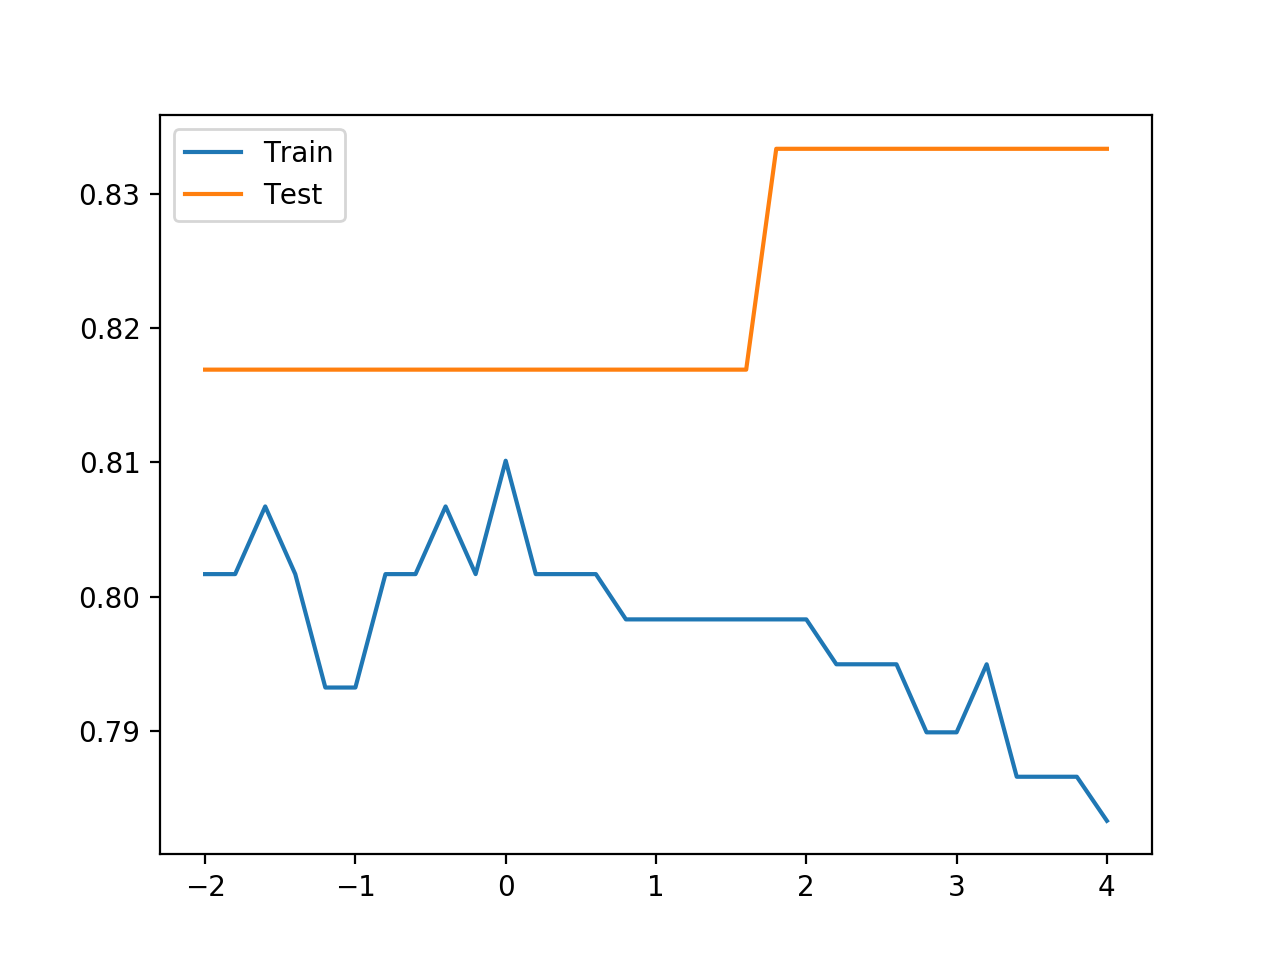

In [50]:
x_axis = [i/10 for i in range(-20,42,2)]
fig = plt.figure()
plt.plot(x_axis,f_measure_train, label ='Train')
plt.plot(x_axis,f_measure_test, label = 'Test')
plt.legend()

## standardized data regression 

In [78]:
f_measure_train_s = []
f_measure_test_s = []
for i in range(-20,42,2):
    ws = method(Xs_train, ys_train, i/10)
    pre_train_s = predict(logistic(ws,Xs_train))
    pre_test_s = predict(logistic(ws,Xs_test))
    f_measure_train_s.append(fmeasure(pre_train_s,y_train))
    f_measure_test_s.append(fmeasure(pre_test_s,y_test))

/Users/yuchenshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


The training cost is: nan
Find w 97001
The training cost is: nan
Find w 96001
The training cost is: nan
Find w 95001
The training cost is: nan
Find w 92001
The training cost is: nan
Find w 88001
The training cost is: nan
Find w 82001
The training cost is: nan
Find w 70001
The training cost is: nan
Find w 44001
The training cost is: 0.01637854696246266
Find w 22581
The training cost is: 0.022754104050262052
Find w 16520
The training cost is: 0.027600787484794338
Find w 13667
The training cost is: 0.03165818898698767
Find w 11915
The training cost is: 0.035315840875829986
Find w 10635
The training cost is: 0.03855864526466994
Find w 9708
The training cost is: 0.04150441854230423
Find w 8993
The training cost is: 0.044375043100258096
Find w 8350
The training cost is: 0.0469018442509891
Find w 7884
The training cost is: 0.04942137493061696
Find w 7433
The training cost is: 0.05180189831697789
Find w 7046
The training cost is: 0.05393066112006641
Find w 6760
The training cost is: 0.05609675

<IPython.core.display.Javascript object>


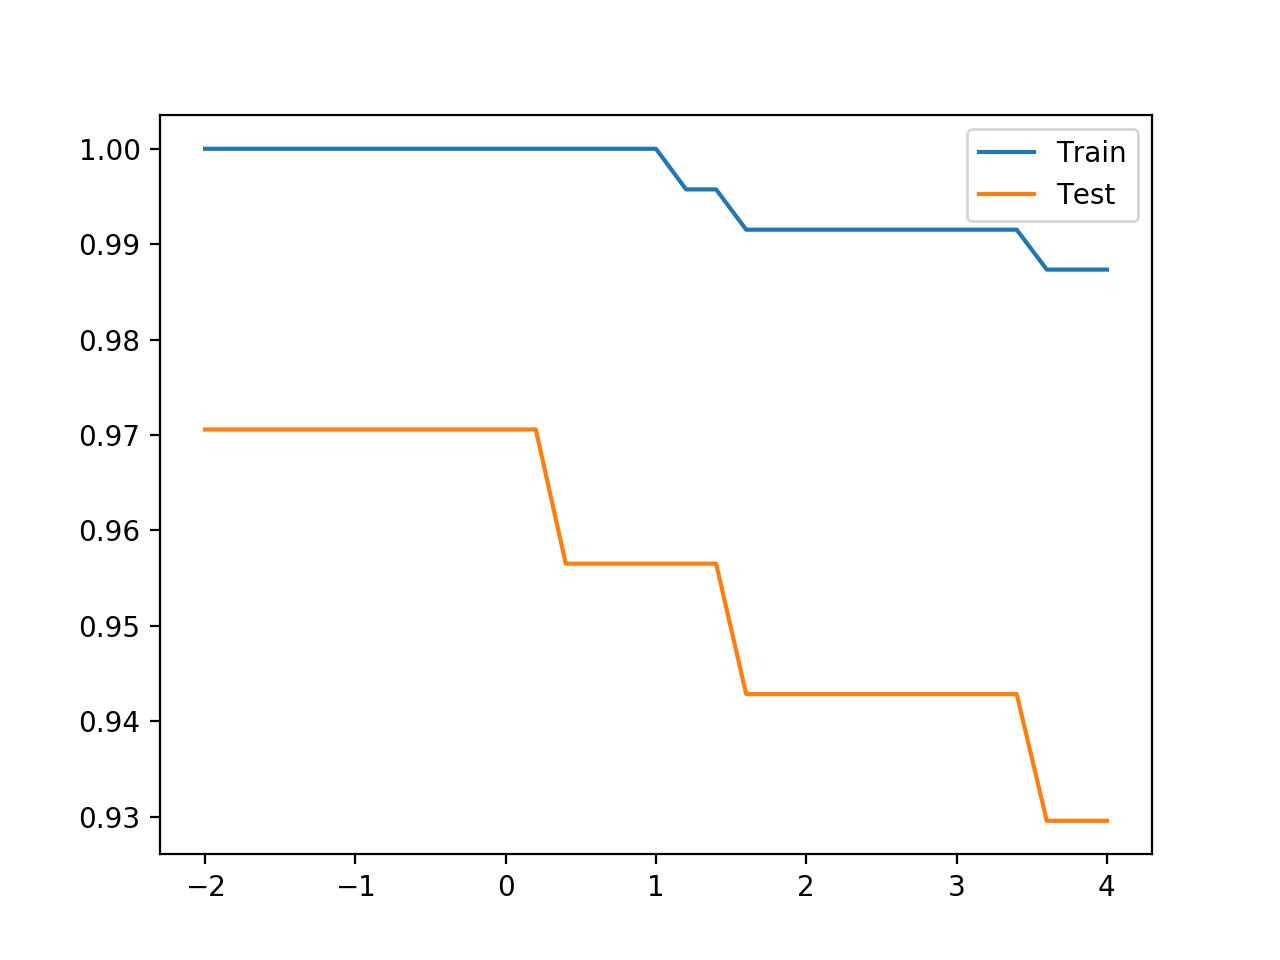

In [79]:
x_axis = [i/10 for i in range(-20,42,2)]
fig = plt.figure()
plt.plot(x_axis,f_measure_train_s, label ='Train')
plt.plot(x_axis,f_measure_test_s, label = 'Test')
plt.legend()